In [5]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib import dates

import matplotlib.dates as mdates
import matplotlib.ticker as plticker
from matplotlib.dates import DateFormatter
import time



cw = pd.read_csv('ged191.csv')

#Drop unwanted columns 

drop_these = ['id','low', 'high', 'event_clarity', 'date_prec', 'conflict_new_id', 
              'conflict_name','dyad_name', 'dyad_new_id','side_a_new_id','adm_1','adm_2', 'gwnoa', 'side_b_new_id', 'dyad_new_id', 'gwnob', 'number_of_sources'
              , 'source_headline', 'priogrid_gid', 'source_date', 'source_office', 'source_article', 
              'source_original', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'date_start', 
              'date_end', 'country_id', 'side_a', 'side_b', 'where_prec']


cw.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made


cw_year = cw[cw.year == 2018]



In [6]:
# I create dummy variables for regions:
region_dummy = pd.get_dummies(cw_year['region'])
# I merge the two dataframes:
cw_year = pd.concat([cw_year, region_dummy], axis=1)
cw_year.head()

,year,active_year,type_of_violence,where_coordinates,latitude,longitude,geom_wkt,country,region,best,Africa,Americas,Asia,Europe,Middle East
2010,2018,1,1,Qush Tepa district,36.193552,65.352724,POINT (65.352724 36.193552),Afghanistan,Asia,45,0,0,1,0,0
2011,2018,1,1,Imam Sahib district,37.105713,68.851658,POINT (68.851658 37.105713),Afghanistan,Asia,28,0,0,1,0,0
2012,2018,1,1,Bala Bagh village,34.389900,70.227900,POINT (70.227900 34.389900),Afghanistan,Asia,7,0,0,1,0,0
2013,2018,1,1,Khaki Safed district,32.755167,62.073124,POINT (62.073124 32.755167),Afghanistan,Asia,23,0,0,1,0,0
2014,2018,1,1,Khwaja Sabz Posh district,36.055429,64.978235,POINT (64.978235 36.055429),Afghanistan,Asia,16,0,0,1,0,0


2018    9002
Name: year, dtype: int64

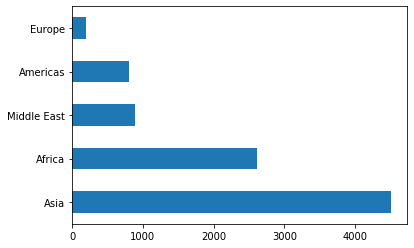

In [8]:

cw_year['region'].value_counts()

Asia = cw_year['region'].value_counts().plot(kind='barh')



In [ ]:

# We can now make the barplot showing outbreaks over time
fig, ax = plt.subplots(figsize = (15,6))
fig = cw_year.plot(x="region", y=["best"], kind="bar", color=['lightblue'], width=2, ax=ax)

x = cw_year['region']

plt.title('Armed conflicts 2018')
plt.ylabel('Deaths')
plt.xlabel('region')

plt.show()

In [ ]:
print(5)


In [ ]:
df_africa["count"] = df_africa.groupby("year")["best"].transform('count')